<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Statistics_and_ProbabilityDheeraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistics and Probability: Fundamentals

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

What is Probability?

Definitions

In nature as in Computer science,one of the several events can be predicted to occur, but we do not know exactly which of them will occur.The key concepts in Probability:

> **Uncertainty** : Uncertainty Events occur with unknown outcomes

>**Samples** : Samples Individual experiments or trails.

> **Sample Space** :  Sample space is a set of all possible outcomes.

> **Boolean Conditions** :Boolean condition have a specific criteria for favorable outcomes.

> **Favorable Samples** : In favorable samples Outcomes that meet a specific condition.

>**Probability** : The probanbility is a "Ratio of favorable samples to total samples".Probability  is denoted by "P".
  
    Probability formula : (Number of Favorable samples)\(Total number of Samples)

> **Equally  likely** : In equally likely each samples has an equal chance.

>**Probability Distribution** : The probability distribution have samples can have varying likelihoods.

>**Conditional Probability** : Probability based on specific conditions.

>**Applications** : The probability applications used in nature and in computer science and statistics.





In [2]:
import numpy as np
import pandas as pd

# Coin toss with custom probability
def toss_coin(n=100,p_heads=0.5):
  return pd.Series(np.random.choice(['Heads','Tails'],n, p=[p_heads,1-p_heads]))

# Dice throw with custom sides
def throw_dice(n=100, sides=6):
  return pd.Series(np.random.randint(1,sides+1, n))

#Example usage
coin_toss = toss_coin(n=50, p_heads=0.6)
dice_throw = throw_dice(n=50, sides=20)
print(coin_toss.value_counts())
print(dice_throw.value_counts())

Heads    28
Tails    22
Name: count, dtype: int64
18    6
10    5
9     5
5     5
6     4
12    4
20    3
14    3
11    3
2     2
13    2
15    2
1     1
16    1
4     1
17    1
7     1
8     1
Name: count, dtype: int64


In [4]:
results=pd.Series(np.random.choice(['Heads','Tails'],100))
px.bar(x=results.value_counts().index, y=results.value_counts().values).show()

**Derived Probability Distributions**

Given 20 coins tosses, a sequence of Bernoulli trials, What's the probability of exactyly 7 heads?

The resulting probability distribution is a Binomial distribution,resembling a Bell_shaped curve.This  phenomenon occurs with multiple independent and identically distributed(i.i.d) random variables, governed bythe Central Limit Theorem(CLT).The probability can be calculated using the Binomial probability formula:P(X=K)=(nCk) * (p^k) * (q^(n-k))


In [3]:
results=pd.Series(np.random.binomial(20,0.5,1000))
fig=pg.Figure([pg.Bar(x=results.value_counts().index,y=results.value_counts().values)])
fig.show()

Let's try to see if we loss the coin 500 and 600 times,then what happens.Looks similar,and more like a bell than before.

In [4]:
import pandas as pd
import numpy as np
results_750 = pd.Series(np.random.binomial(750, 0.5, 1000))
fig_750 = pg.Figure([pg.Bar(x=results_750.value_counts().index, y=results_750.value_counts().values)])
fig_750.update_layout(title='Distribution of Heads in 750 Coin Tosses',
                      xaxis_title='Number of Heads',
                      yaxis_title='Frequency')
fig_750.show()

How much to Sample

**The key points to remember how much to Sample**

1.   **Theoretical Probability** : Expected probability of an event
       (E.g, 1/6 for rolling a 2 on a fair dice)

2.   **Experimental Probability** : The experimental probability is an observed probability from finite samples.

3.   **Regression to the Mean** : Regression to the mean  is a Extreme deviations regress towards to the mean.

4.   **Sample Size Matters** : Sample size matters has a more samples increase correctness and reliabilty

5.**Convergence** : The convergence has a experimental probabilities approach theoritical  probabilities with more samples.


In [10]:
import numpy as np
import plotly.graph_objects as pg

# Corrected function call to generate random integers for a single dice roll
random_numbers =  np.random.randint(1,7)

# Corrected function call and logic to count occurrences and calculate probabilities
results = {}
for shots in [10, 100, 1000, 10000, 100000]:
    # Generate random integers (dice rolls) for the given number of shots
    result = np.random.randint(1, 7, shots)
    # Get unique values and their counts
    unique_values, counts = np.unique(result, return_counts=True)
    # Calculate probabilities
    probabilities = counts / shots
    results[shots] = {'values': unique_values, 'probabilities': probabilities}


# Use the processed results to create Plotly bars
fig = pg.Figure(data=[pg.Bar(x=result['values'], y=result['probabilities'], name=f'{shots}shots') for shots, result in results.items()])

# Add a horizontal line at 1/6 for theoretical probability
fig.add_hline(y=1/6,line_dash ="dash", line_color="red")
fig.update_layout(title="Dice Roll Probabilities", xaxis_title="outcome", yaxis_title="Probability")
fig.show()

Simulating to compute Expectation

In [13]:
# prompt: simulating to compute Expectation  give in a short 8 lines  of code effectively output should be cards of thrown like 11cards, 26 cards 9, 3,4 8 7 6 cards type of output to get the output should be no of cards are thrown should repersent in serial plot what the cards they with them in 10 type different cards holder should get in output

import pandas as pd
import numpy as np
# Simulating drawing cards from a deck with replacement
cards = list(range(1, 11)) # Cards numbered 1 to 10
num_holders = 10
cards_drawn_per_holder = 50
results = {}
for i in range(num_holders):
  holder_cards = np.random.choice(cards, cards_drawn_per_holder, replace=True)
  results[f'Holder {i+1}'] = holder_cards

# Print the cards each holder has (sample)
for holder, drawn_cards in results.items():
    print(f"{holder} cards: {drawn_cards[:5]}...({len(drawn_cards)} cards total)")

# Visualize the distribution of drawn cards for each holder
data_to_plot = []
for holder, drawn_cards in results.items():
    unique_cards, counts = np.unique(drawn_cards, return_counts=True)
    for card, count in zip(unique_cards, counts):
        data_to_plot.append({'Holder': holder, 'Card': card, 'Count': count})

df_plot = pd.DataFrame(data_to_plot)

fig = px.bar(df_plot, x="Card", y="Count", color="Holder", barmode="group",
             title="Distribution of Cards Drawn by Each Holder")
fig.show()


Holder 1 cards: [ 4  1  7 10  3]...(50 cards total)
Holder 2 cards: [3 1 8 6 2]...(50 cards total)
Holder 3 cards: [ 4 10 10  8  3]...(50 cards total)
Holder 4 cards: [6 1 2 9 9]...(50 cards total)
Holder 5 cards: [4 3 2 6 1]...(50 cards total)
Holder 6 cards: [5 9 5 7 9]...(50 cards total)
Holder 7 cards: [6 9 6 5 1]...(50 cards total)
Holder 8 cards: [4 4 2 4 5]...(50 cards total)
Holder 9 cards: [1 2 2 9 8]...(50 cards total)
Holder 10 cards: [ 2  5 10  5  7]...(50 cards total)


Visualize the Underlying Probability Mass Distribution

In [14]:
import numpy as np
# Calculate the overall distribution of drawn cards across all holders
all_drawn_cards = []
for holder_cards in results.values():
    all_drawn_cards.extend(holder_cards)

unique_cards_all, counts_all = np.unique(all_drawn_cards, return_counts=True)
probabilities_all = counts_all / len(all_drawn_cards)

# Create a bar chart for the probability mass distribution
fig_pmf = pg.Figure(data=[pg.Bar(x=unique_cards_all, y=probabilities_all)])

fig_pmf.update_layout(title='Underlying Probability Mass Distribution of Drawn Cards',
                       xaxis_title='Card Value',
                       yaxis_title='Probability')

fig_pmf.show()

Measurements and Error

In [ ]:
Using Mean squared Error

Mean Squared Error: 0.03800000000000001


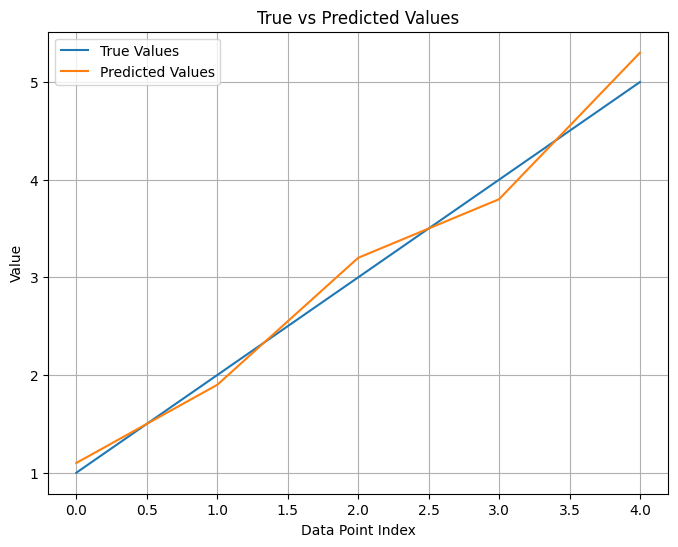

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Generate some example data (replace with your actual data)
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.2, 3.8, 5.3])
# Calculate the Mean Squared Error
mse = np.mean((y_true - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')
# Create a simple plot to visualize the error
plt.figure(figsize=(8, 6))
plt.plot(y_true, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('True vs Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Standardisation

In [17]:
import pandas as pd
df = pd.DataFrame({'col1': [1, 2, 3, 4], 'col2': [10, 20, 30, 40]})
standardized_df = (df - df.mean()) / df.std()
standardized_df


,col1,col2
0,-1.161895,-1.161895
1,-0.387298,-0.387298
2,0.387298,0.387298
3,1.161895,1.161895


In [18]:
# prompt: Using dataframe standardized_df: Using dataframe:
# standardized_duuu

standardized_df

,col1,col2
0,-1.161895,-1.161895
1,-0.387298,-0.387298
2,0.387298,0.387298
3,1.161895,1.161895


In [19]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=standardized_df)

https://docs.google.com/spreadsheets/d/1Y7LtSGB13TytyqqabUOWgm-X7MB8SMsHRDg_fuMAFfI/edit#gid=0


Binomial distribution

In [22]:
from scipy.stats import binom

Mathematics of probability

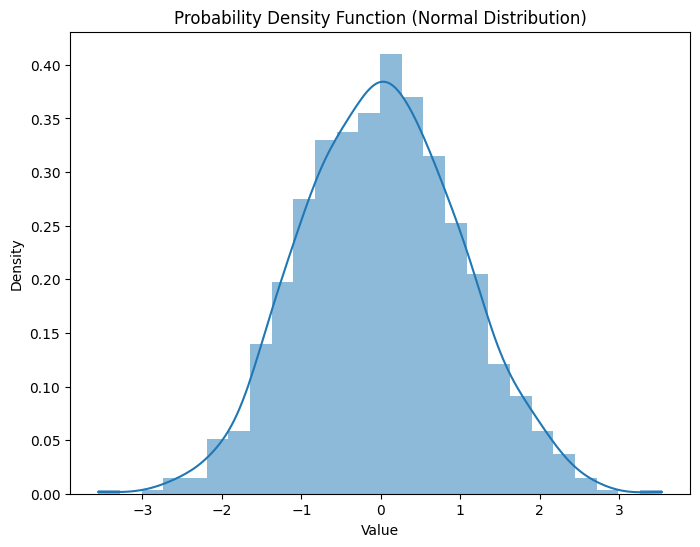

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Probability Density Function (PDF) - Counterpart to PMF for continuous variables
# Generate data from a normal distribution
mu = 0  # Mean
sigma = 1 # Standard deviation
data = np.random.normal(mu, sigma, 1000)

# Plot the histogram and the PDF
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, stat="density", linewidth=0)
plt.title('Probability Density Function (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

PROGRAMMATIC SOLUTIONS: PERCENT POINT FUNCTION

In [23]:
from scipy.stats import norm
print(norm.cdf(0))


0.5


In [24]:
result = norm.ppf(0.5)
print(f"{result},{result}")

np.float64(0.0)

Standard deviation rule/Empirical rule

Example height

In [27]:
result_with_scale = norm.ppf(0.5, loc=180, scale=5.85)
print(f"{result},{result_with_scale}")

0.0,180.0


Possion Distribution

In [ ]:
from scipy.stats import poisson

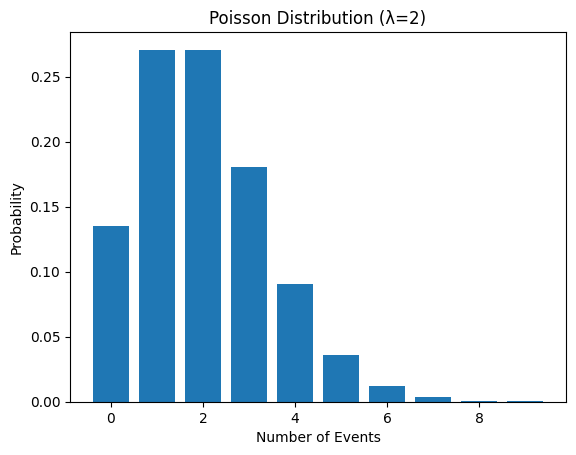

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson # Add this import here
lambda_val = 2
x = np.arange(0, 10)
poisson_pmf = poisson.pmf(x, lambda_val)
plt.bar(x, poisson_pmf)
plt.title('Poisson Distribution (λ=2)')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

In [30]:
 # The average (Expected Value) is calculated by summing the product of each outcome and its corresponding probability.
expected_value = sum(unique_cards_all * probabilities_all)
print(f"Expected Value of a drawn card: {expected_value}")

Expected Value of a drawn card: 5.622


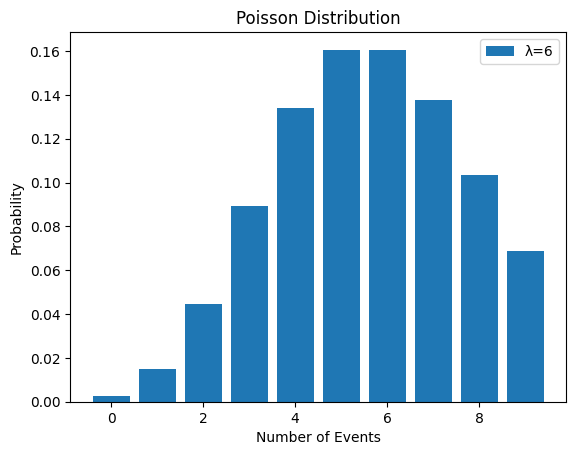

In [32]:
import matplotlib.pyplot as plt
import numpy as np
lambda_val = 6
x = np.arange(0, 10)
poisson_pmf = poisson.pmf(x, lambda_val)
plt.bar(x, poisson_pmf, label=f'λ={lambda_val}')
plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.show()

Central Limit Theorem

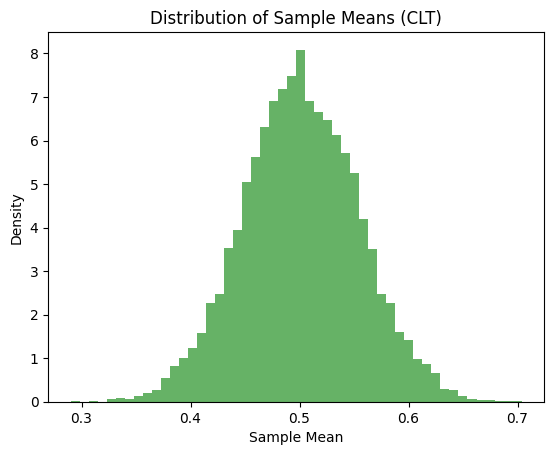

In [33]:
import matplotlib.pyplot as plt
import numpy as np
n_samples = 10000
sample_size = 30
sample_means = [np.mean(np.random.rand(sample_size)) for _ in range(n_samples)]
plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='g')
plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

Using normal Distribution in Weight intialization

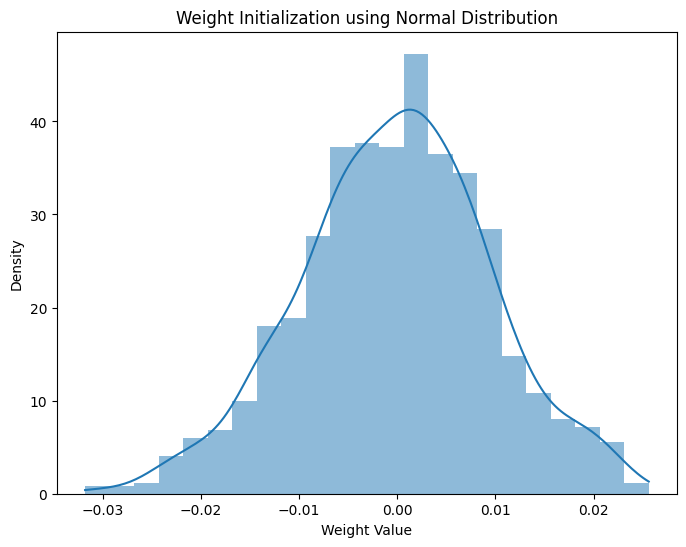

In [34]:
import matplotlib.pyplot as plt
import numpy as np
weights = np.random.normal(loc=0, scale=0.01, size=1000)
plt.figure(figsize=(8, 6))
sns.histplot(weights, kde=True, stat="density", linewidth=0)
plt.title('Weight Initialization using Normal Distribution')
plt.xlabel('Weight Value')
plt.ylabel('Density')
plt.show()
